Link : 

[Video Tutorial](https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLm4Z6SjLiJt_wYPv16CbIZQ-OL9-fGwgW&index=1&t=87s&ab_channel=KeithGalli)

[Source Data](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

[Data Studio Saya](https://datastudio.google.com/reporting/1c9ce85c-5cda-4cf9-bf63-48bec85ba707)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#Gabungkan semua data

##Cara Manual

In [2]:
January = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_January_2019.csv')
February = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_February_2019.csv')
March = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_March_2019.csv')
April = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
May = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_May_2019.csv')
June = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_June_2019.csv')
July = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_July_2019.csv')
August = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_August_2019.csv')
September = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_September_2019.csv')
October = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_October_2019.csv')
November = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_November_2019.csv')
December = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/Sales_December_2019.csv')

In [3]:
data = pd.concat([January,February,March,April,May,June,July,August,September,October,November,December])

##Cara otomatis

In [4]:
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data')]
data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/Sales_Data/'+file)
  data = pd.concat([data, df]) #Tambahkan data yang sudah ada dan df yang baru

In [5]:
# data.to_csv('New Data.csv', index=False)

# Baca data terbaru

In [6]:
datas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/SalesAnalysis/New Data.csv')

# Bersihkan Data

In [7]:
#Hapus semua data kosong
datas = datas.dropna(how='all')
#cek data kosong
null_datas = datas[datas.isna().any(axis=1)]
null_datas

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Tambahkan kolom bulan
datas['Month'] = datas['Order Date'].str[:2] #Ambil 2 data dari kolom Order Date yang dimulai dari index ke-0
#Hapus data yang Or dengan cara timpa datas dengan kolom Month yang tidak sama dengan Or
datas = datas[datas['Month'].str[:2]!='Or']
#Ubah bulan menjadi string
datas['Month'] = datas['Month'].astype('int64') # invalid literal for int() with base 10: 'Or'

In [9]:
#Tambahkan kolom Total Price

# Ubah menjadi int agar bisa dilakukan operasi aritmatika
# Menggunakan pd.to_numeric karena lebih powerfull dalam mengatasi error, karena price each berupa float data.
datas['Quantity Ordered'] = pd.to_numeric(datas['Quantity Ordered'])
datas['Price Each'] = pd.to_numeric(datas['Price Each'])

#Buat kolom baru
datas['Total Price'] = datas['Quantity Ordered'] * datas['Price Each']
datas

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",1,109.99
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",1,149.99
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",1,999.99
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",1,5.98


In [28]:
#Tambahkan kolom city
def get_city(city):
  return city.split(',')[1] #Ambil index ke-1 setelah koma (kota)
def get_portal(kode):
  return kode.split(',')[2].split(' ')[1] #Ambil index ke-2 setelah koma, lalu ambil lagi index pertama setelah spasi (kode)

datas['City'] = datas['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_portal(x)})")
datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


# Analisis

## 1. Bulan penjualan terbaik dan pendapatannya

In [29]:
best_month = datas.groupby('Month').sum().sort_values(by='Total Price', ascending=False)
best_month

,Quantity Ordered,Price Each,Total Price,Hour,Minute
Month,,,,,
12,28114,4588415.41,4613443.34,359978,733082
10,22703,3715554.83,3736726.88,290650,598437
4,20558,3367671.02,3390670.24,262259,544186
11,19798,3180600.68,3199603.20,254865,518231
5,18667,3135125.13,3152606.75,238780,487899
3,17005,2791207.83,2807100.38,218969,447559
7,16072,2632539.56,2647775.76,206169,417349
6,15253,2562025.61,2577802.26,195528,402436
8,13448,2230345.42,2244467.88,172289,353857


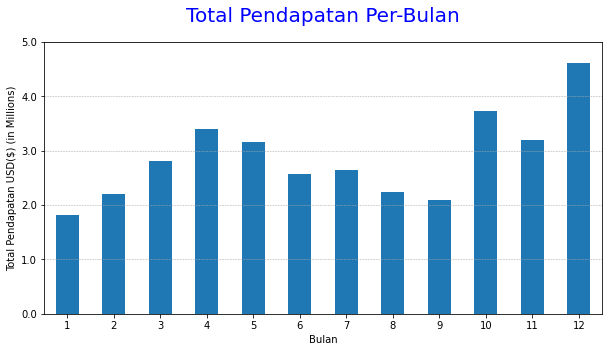

In [30]:
best_month.groupby('Month')['Total Price'].sum().plot(kind='bar')
plt.title('Total Pendapatan Per-Bulan', fontsize=20, pad=20, color='blue')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000))
plt.ylabel('Total Pendapatan USD($) (in Millions)')
plt.xlabel('Bulan')
plt.xticks(rotation=0)
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='y')
plt.gcf().set_size_inches(10,5)
plt.show()

##2. Kota dengan tingkat penjualan tertinggi

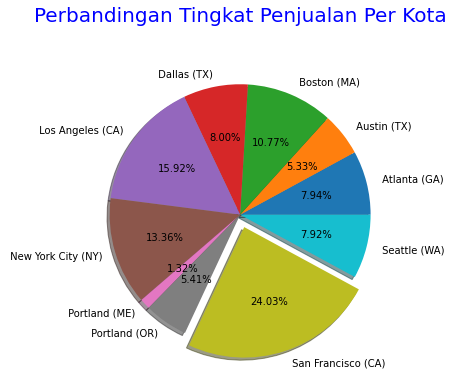

In [35]:
best_city_sells = datas.groupby('City')['Quantity Ordered'].sum().reset_index()
plt.figure(figsize=(6,6))
explode = [0,0,0,0,0,0,0,0,0.1,0]
plt.pie(best_city_sells['Quantity Ordered'], labels = best_city_sells['City'],autopct='%1.2f%%', explode=explode, shadow=True)
plt.title('Perbandingan Tingkat Penjualan Per Kota', loc='center', pad=30, fontsize=20, color='blue')
plt.show()

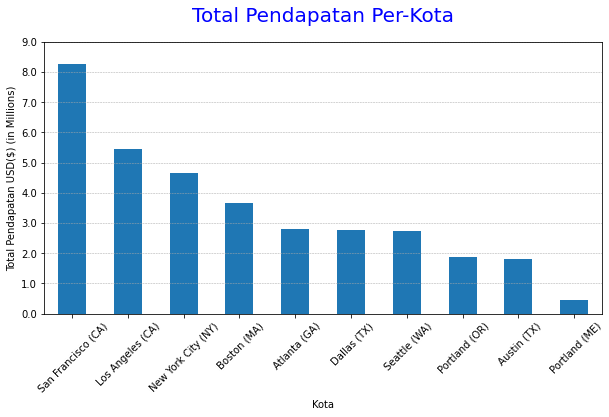

In [36]:
best_city_earned = datas.groupby('City')['Total Price'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Pendapatan Per-Kota', fontsize=20, pad=20, color='blue')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000))
plt.ylabel('Total Pendapatan USD($) (in Millions)')
plt.xlabel('Kota')
plt.xticks(rotation=45)
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='y')
plt.gcf().set_size_inches(10,5)
plt.show()

##3. Best Selling Products

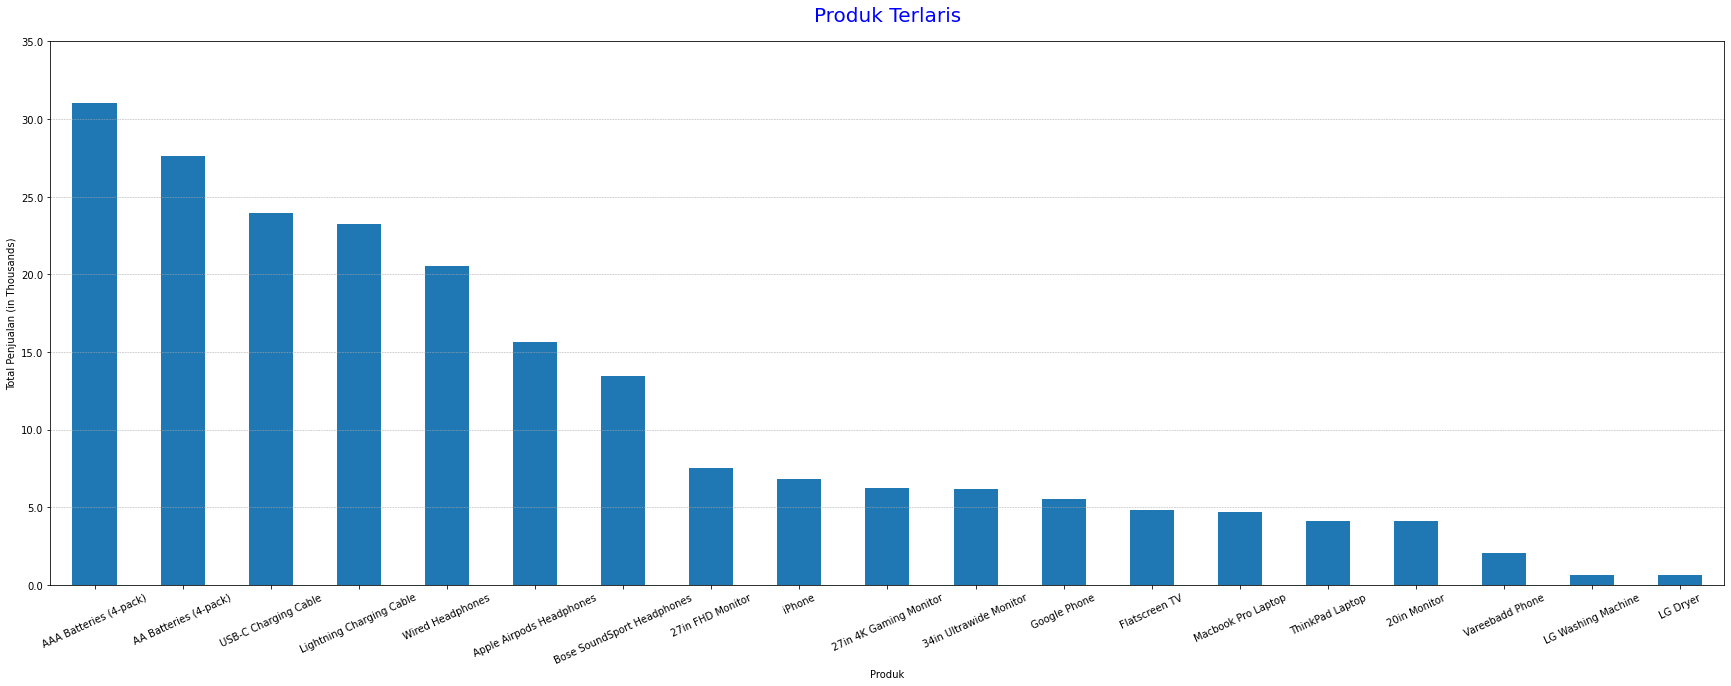

In [37]:
best_selling_products = datas.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
best_selling_products.plot(kind='bar')
plt.title('Produk Terlaris', fontsize=20, pad=20, color='blue')
plt.ylabel('Total Penjualan (in Thousands)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000))
plt.ylim(ymin=0)
plt.xlabel('Produk')
plt.xticks(rotation=25)
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='y')
plt.gcf().set_size_inches(30,10)
plt.show()

##4. Best Valueable Products

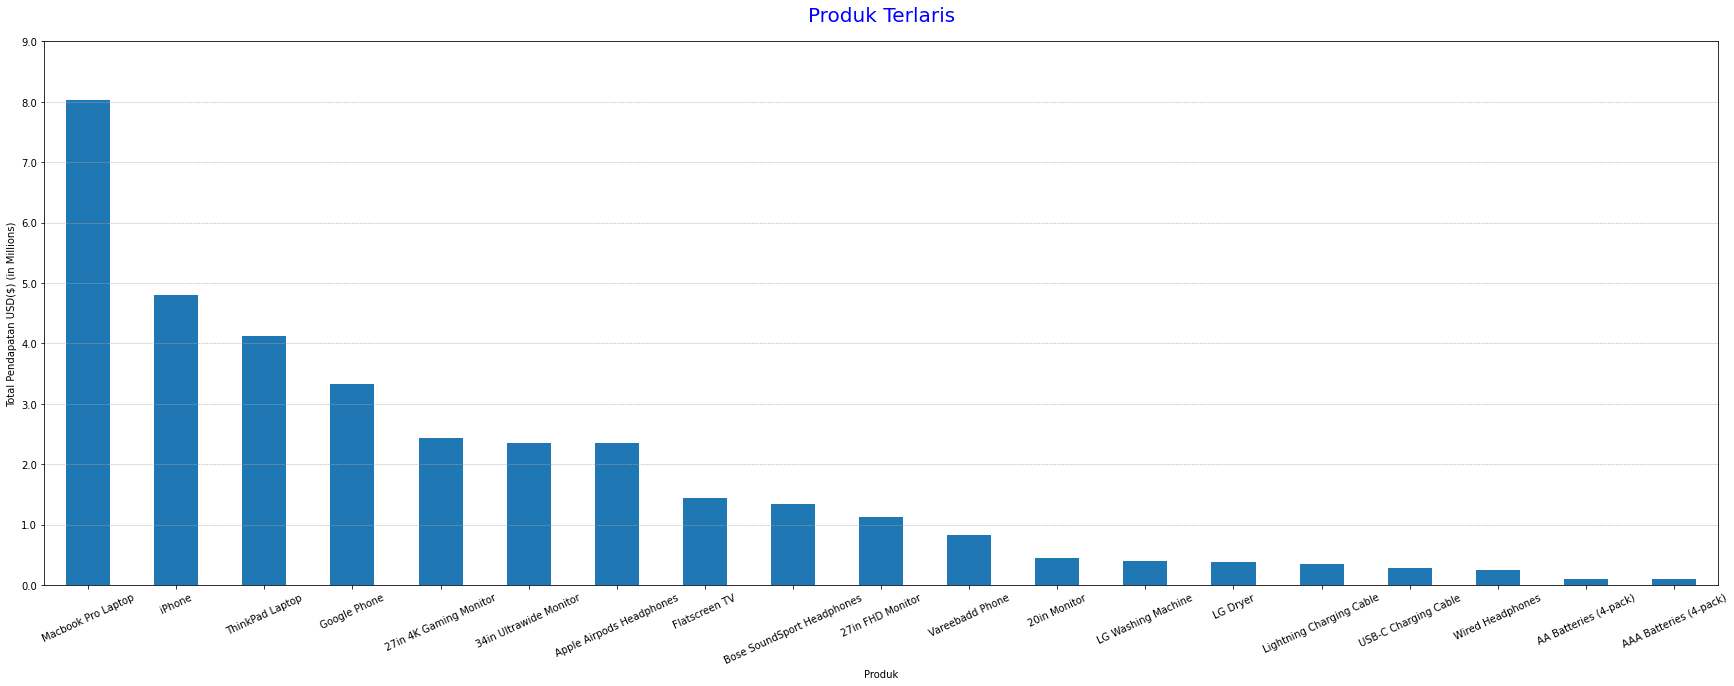

In [38]:
best_valueable_products = datas.groupby('Product')['Total Price'].sum().sort_values(ascending=False)
best_valueable_products.plot(kind='bar')
plt.title('Produk Terlaris', fontsize=20, pad=20, color='blue')
plt.ylabel('Total Pendapatan USD($) (in Millions)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000))
plt.ylim(ymin=0)
plt.xlabel('Produk')
plt.xticks(rotation=25)
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='y')
plt.gcf().set_size_inches(30,10)
plt.show()

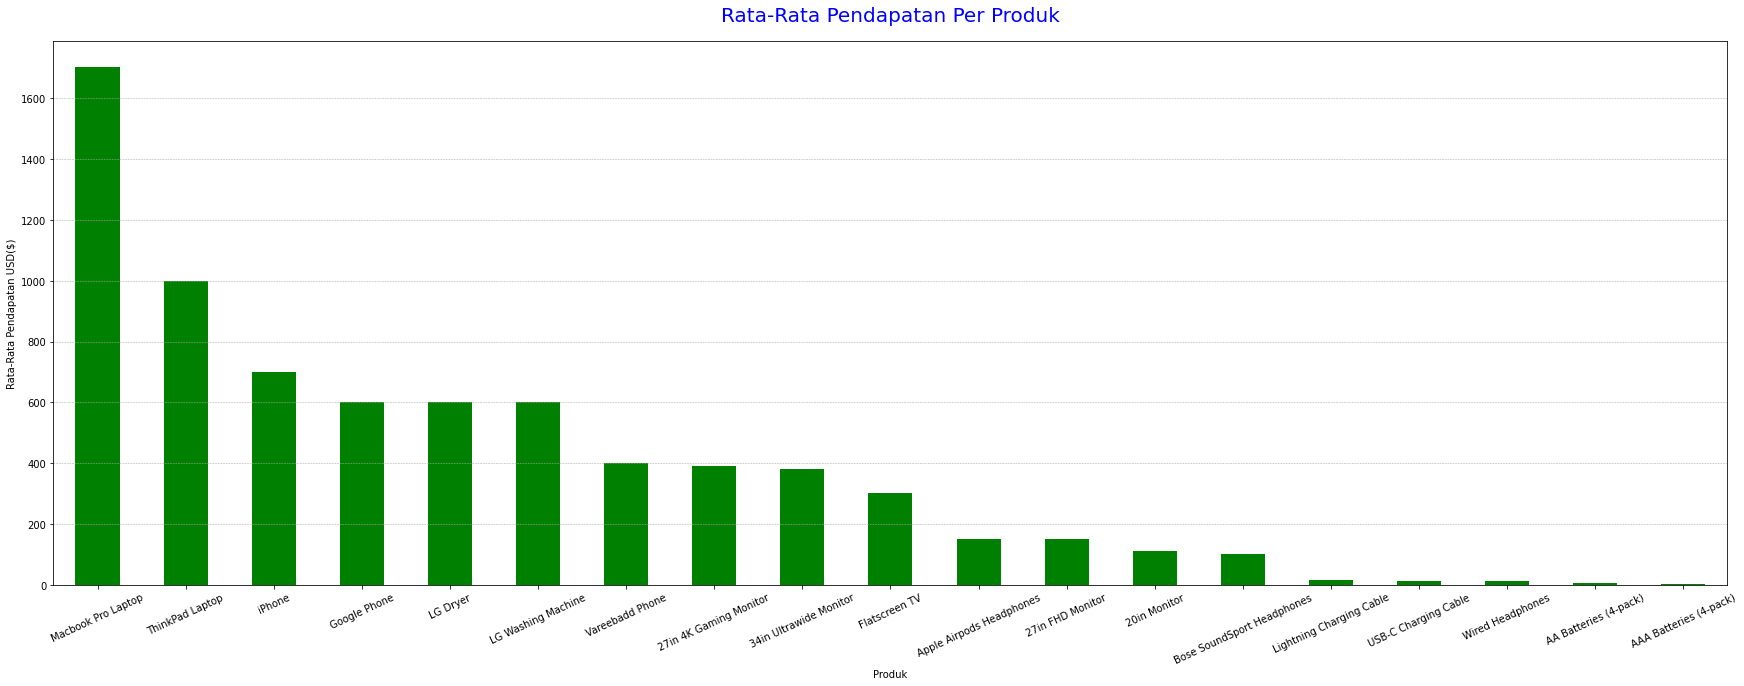

In [39]:
#rata-rata pendapatan per product
pendapatan = datas.groupby('Product')['Total Price'].mean()
pendapatan = round(pendapatan, 2) #agar menjadi 2 digit dan dibulatkan terdekat
pendapatan.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Rata-Rata Pendapatan Per Produk', fontsize=20, pad=20, color='blue')
plt.ylabel('Rata-Rata Pendapatan USD($)')
plt.ylim(ymin=0)
plt.xlabel('Produk')
plt.xticks(rotation=25)
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='y')
plt.gcf().set_size_inches(30,10)
plt.show()

##5. Performa Penjualan Products

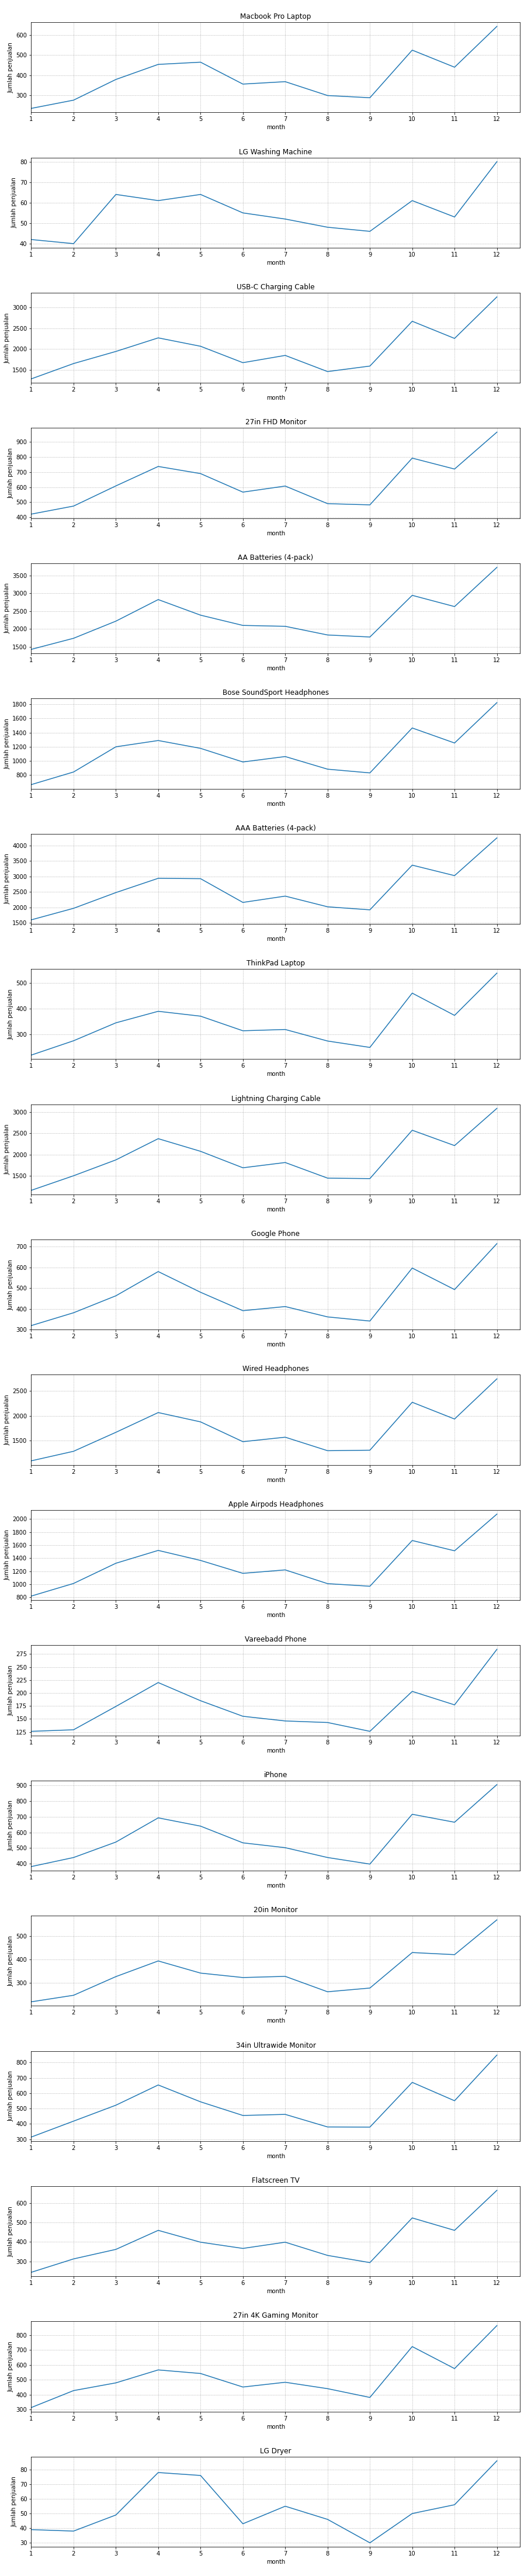

In [40]:
#Simpan semua nama product yang unique ke dalam variabel
product = datas['Product'].unique()

#Lakukan looping untuk setiap nama variabel
fig, axes = plt.subplots(19,1, figsize=(15, 30))
plt.subplots_adjust(bottom=0, 
                    top=2, #2 dari figsize (10)
                    wspace=0, 
                    hspace=0.5)
for i, x in enumerate(product):
  performa = datas[datas['Product']==x]
  performa.groupby('Month')['Quantity Ordered'].sum().plot(
      title = f'\n{x}',
      ax = axes[i]
  )
  axes[i].set_ylabel('Jumlah penjualan')
  axes[i].set_xlabel('month\n')
  axes[i].set_xticks(np.arange(0, 13, 1)) # Supaya interval x-nya 1 
  axes[i].grid(color = 'darkgray', linestyle = '--', linewidth = 0.5)
  axes[i].set_xlim(xmin=1)

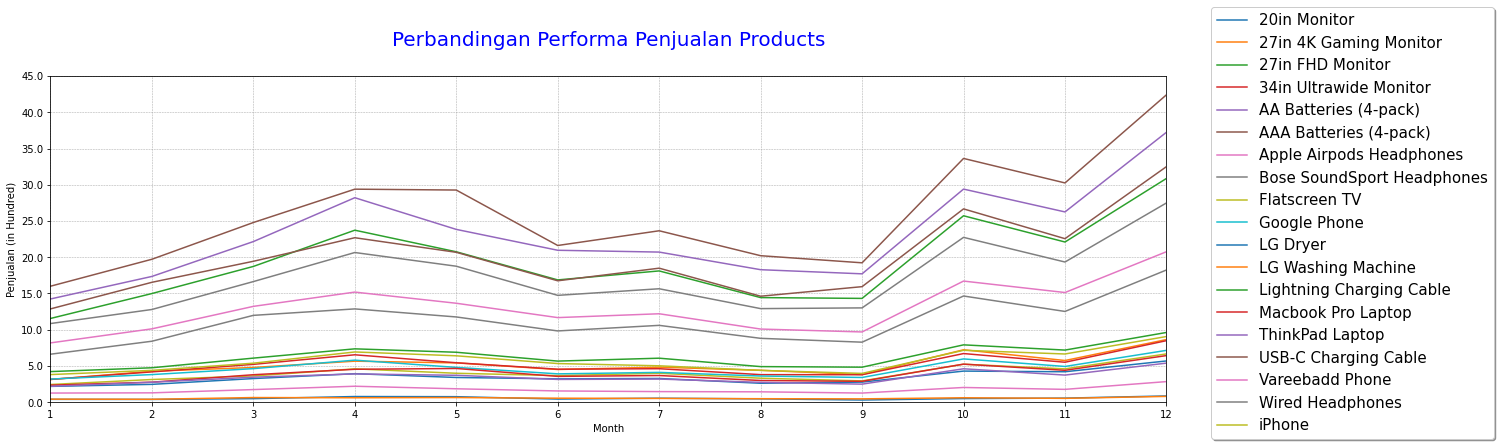

In [41]:
datas.groupby(['Month','Product'])['Quantity Ordered'].sum().unstack(level='Product').plot()
plt.legend(loc=7, bbox_to_anchor=(0.8, 0.3, 0.5, 0.5), shadow=True, fontsize=15)
plt.title('Perbandingan Performa Penjualan Products', fontsize=20, pad=30, color='blue')
plt.gcf().set_size_inches(20,6)
plt.xticks(np.arange(1,13,1))
plt.xlim(xmin=1, xmax=12)
plt.ylim(ymin=0)
plt.ylabel('Penjualan (in Hundred)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100))
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5)
plt.show()

##6. Waktu Terbaik Untuk Promosi

In [42]:
#Konversi menjadi datetime
datas['Order Date'] = pd.to_datetime(datas['Order Date'])
datas['Hour'] = datas['Order Date'].dt.hour
datas['Minute'] = datas['Order Date'].dt.minute

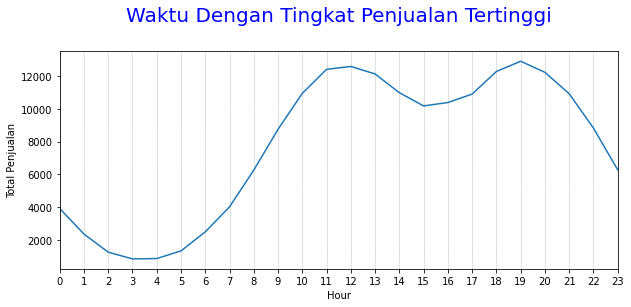

In [43]:
best_hour = datas.groupby('Hour')['Quantity Ordered'].count()
best_hour.plot()
plt.title('Waktu Dengan Tingkat Penjualan Tertinggi', fontsize=20, pad=30, color='blue')
plt.xticks(np.arange(0,24,1))
plt.xlim(xmin=0, xmax=23)
plt.ylabel('Total Penjualan')
plt.grid(color = 'darkgray', linestyle = '--', linewidth = 0.5, axis='x')
plt.gcf().set_size_inches(10,4)
plt.show()

##7. Product yang Terjual Bareng

In [45]:
# Cari yang order id nya sama
df = datas[datas['Order ID'].duplicated(keep=False)]

# Gabungkan product menjadi satu
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Hapus order ID dan Grouped yang duplicated
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186627,150287,"iPhone,Lightning Charging Cable"
186644,150303,"iPhone,Lightning Charging Cable"
186665,150323,"Google Phone,USB-C Charging Cable,Apple Airpod..."
186679,150335,"iPhone,Apple Airpods Headphones"


In [46]:
#Untuk menghitung total gabungan
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2))) #2 barang yang dibeli bersamaan

#Looping supaya menjadi dict
for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
